In [1]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
#1-1
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#1-2
df = df.dropna(how='any',axis=0)
df.shape

(183, 12)

In [3]:
#1-3
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin']
for column in columns_to_drop:
    df = df.drop(column, axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
1,1,1,female,38.0,71.2833,C
3,1,1,female,35.0,53.1000,S
6,0,1,male,54.0,51.8625,S
10,1,3,female,4.0,16.7000,S
11,1,1,female,58.0,26.5500,S


In [4]:
#1-4
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


columns_to_encode = ["Embarked","Sex"]
for column in columns_to_encode:
    dummies = pd.get_dummies(data=df[column],prefix=column)
    df = pd.concat([df.drop(column,axis=1),dummies],axis=1)
df.head()

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
1,1,1,38.0,71.2833,1,0,0,1,0
3,1,1,35.0,53.1000,0,0,1,1,0
6,0,1,54.0,51.8625,0,0,1,0,1
10,1,3,4.0,16.7000,0,0,1,1,0
11,1,1,58.0,26.5500,0,0,1,1,0


In [5]:
#1-5
x = df.drop("Survived",axis=1)
y = df["Survived"]
print(x.shape)
print(y.shape)

(183, 8)
(183,)


In [6]:
#2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(128, 8)
(128,)
(55, 8)
(55,)


In [7]:
#3
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mlp = MLPClassifier()
mlp.fit(x_train,y_train)

pr_test = mlp.predict(x_test)
acc_test_before_normal = accuracy_score(y_test, pr_test)
print("accuracy of mlp on test set :",acc_test_before_normal)

accuracy of mlp on test set : 0.6727272727272727


In [8]:
#4 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.drop("Survived",axis=1)

columns = x.columns
x = pd.DataFrame(scaler.fit_transform(x),columns = columns)
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
mlp = MLPClassifier()

mlp.fit(x_train,y_train)

pr_test = mlp.predict(x_test)
acc_test_after_normal = accuracy_score(y_test, pr_test)
print("accuracy of mlp on test set before standardizing data:",acc_test_before_normal)
print("accuracy of mlp on test set after standardizing data:",acc_test_after_normal)

(128, 8)
(128,)
(55, 8)
(55,)
accuracy of mlp on test set before standardizing data: 0.6727272727272727
accuracy of mlp on test set after standardizing data: 0.7454545454545455


### because of extremely long period of training, i reduced the search space of hidden layers


In [10]:
from sklearn.model_selection import GridSearchCV

solver = ['adam','sgd']
learning_rate_init = [1e-1,1e-2,1e-3,1e-4,1e-5]
# hidden_layer_sizes=[(100,),
#  (1000,),
#  (100, 100),
#  (100, 1000),
#  (1000, 100),
#  (1000, 1000),
#  (100, 100, 100),
#  (100, 100, 1000),
#  (100, 1000, 100),
#  (100, 1000, 1000),
#  (1000, 100, 100),
#  (1000, 100, 1000),
#  (1000, 1000, 100),
#  (1000, 1000, 1000)]
hidden_layer_sizes = [(100,),(1000,)]

activation = ['identity', 'tanh', 'relu']
params={'solver':solver,
    'learning_rate_init':learning_rate_init,
    'hidden_layer_sizes':hidden_layer_sizes,
    'activation':activation}


gsv = GridSearchCV(mlp,params,n_jobs = 2)
gsv.fit(x_train, y_train)

print("Best Parameters :",gsv.best_params_)
print("random search Score :",(gsv.best_score_*100).round(2),'%')
mlp_best = gsv.best_estimator_
pr_test = mlp_best.predict(x_test)
acc_test = accuracy_score(y_test, pr_test)
print("accuracy of best mlp in random search on test set:",acc_test)

Best Parameters : {'activation': 'identity', 'hidden_layer_sizes': (1000,), 'learning_rate_init': 0.001, 'solver': 'adam'}
random search Score : 77.23 %
accuracy of best mlp in random search on test set: 0.7090909090909091


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted labels', ylabel='True labels'>

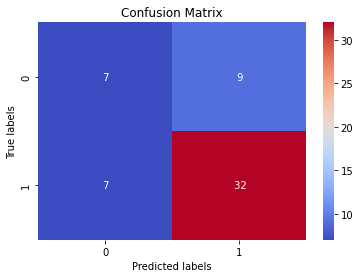

In [13]:
#6
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, pr_test)
ax = plt.subplot()
sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax

In [19]:
from sklearn.metrics import f1_score,precision_recall_fscore_support
result = precision_recall_fscore_support(y_test,pr_test)
headers = ['precision','recall','fscore']
for i,header in enumerate(headers):
    for j in range(2):
        print(header,"for class",j," = ",result[i][j])

precision for class 0  =  0.5
precision for class 1  =  0.7804878048780488
recall for class 0  =  0.4375
recall for class 1  =  0.8205128205128205
fscore for class 0  =  0.4666666666666667
fscore for class 1  =  0.8
